<a href="https://colab.research.google.com/github/Heartplay/LearnML/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd

iris = pd.read_csv('Iris.csv')
iris.drop('Id', axis = 1, inplace = True)

x = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.1, random_state = 123)

from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = tree_model.predict(x_test)
acc_score = round(accuracy_score(y_pred, y_test), 3)

from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)

In [ ]:
import numpy as np
 
#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])
 
#data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

# menampilkan scatter plot dari dataset
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.scatter(bedrooms, house_price)

from sklearn.linear_model import LinearRegression
 
# latih model dengan Linear Regression.fit()
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

# menampilkan plot hubungan antara jumlah kamar dengan harga rumah
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

In [ ]:
import pandas as pd

df = pd.read_csv('Social_Network_Ads.csv')

data = df.drop(columns = ['User ID'])
data = pd.get_dummies(data)
predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
X = data[predictions]
y = data['Purchased'] 

# lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)

from sklearn.model_selection import train_test_split
 
# bagi data menjadi train dan test untuk setiap atribut dan label
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)

from sklearn import linear_model
 
# latih model dengan fungsi fit
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

# uji akurasi model
model.score(X_test, y_test)

0.825

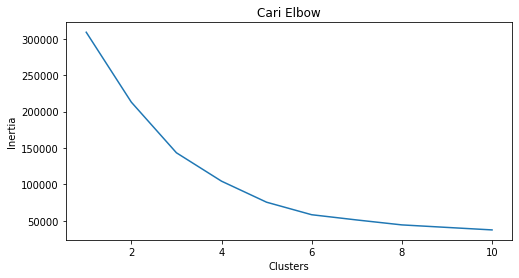

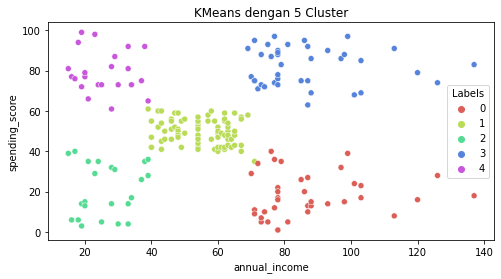

In [ ]:
import pandas as pd
 
#ubah file csv menjadi dataframe
df = pd.read_csv('Mall_Customers.csv')
 
# tampilkan 3 baris pertama
df.head(3)

# ubah nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
 
# ubah data kategorik menjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
 
# # tampilkan data yang sudah di preprocess
# df.head(3)

from sklearn.cluster import KMeans
 
# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)
 
#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i, n_init=10).fit(X)
  clusters.append(km.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# membuat objek KMeans
km5 = KMeans(n_clusters=5, n_init=10).fit(X)
 
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
 
iris = datasets.load_iris()
atribut = iris.data
label = iris.target
 
# bagi dataset menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(
    atribut, label, test_size=0.2, random_state=1)
 
from sklearn import tree
 
decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(X_train, y_train)
model_pertama.score(X_test, y_test)

from sklearn.decomposition import PCA
 
# membuat objek PCA dengan 4 principal component
pca = PCA(n_components=4)
 
# mengaplikasikan PCA pada dataset
pca_attributes = pca.fit_transform(X_train)
 
# melihat variance dari setiap atribut
pca.explained_variance_ratio_

# PCA dengan 2 principal component
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

# uji akurasi classifier
model2 = decision_tree.fit(X_train_pca, y_train)
model2.score(X_test_pca, y_test)

0.9333333333333333

In [ ]:
import pandas as pd
 
df = pd.read_csv('diabetes.csv')

# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]
 
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

from sklearn.preprocessing import StandardScaler
 
# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
 
# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

from sklearn.svm import SVC
 
# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)

# Menampilkan skor akurasi prediksi
clf.score(X_test, y_test)

0.7559055118110236

<ipython-input-12-cb087910bee1>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]


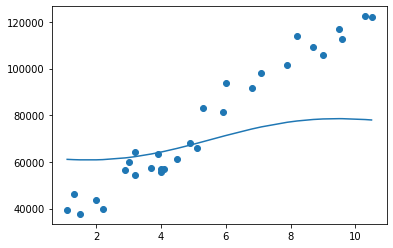

In [ ]:
import pandas as pd
 
# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Salary_Data.csv')

import numpy as np
 
# memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']

# mengubah bentuk atribut
X = X[:,np.newaxis]

from sklearn.svm import SVR
 
# membangun model dengan parameter C, gamma, dan kernel
model  = SVR(C=1000, gamma=0.05, kernel='rbf')
 
# melatih model dengan fungsi fit
model.fit(X,y)

import matplotlib.pyplot as plt
 
# memvisualisasikan model
plt.scatter(X, y)
plt.plot(X, model.predict(X))

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


<ipython-input-11-efcd98e21c60>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]


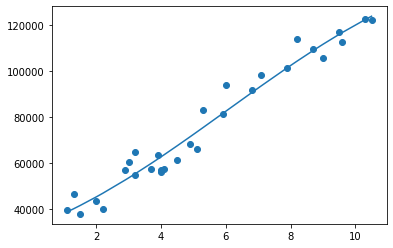

In [ ]:
import pandas as pd
 
# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Salary_Data.csv')

import numpy as np
 
# memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']

# mengubah bentuk atribut
X = X[:,np.newaxis]

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
 
# membangun model dengan parameter C, gamma, dan kernel
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C':     [1000, 10000, 100000],
    'gamma': [0.5, 0.05,0.005]
}
grid_search = GridSearchCV(model, parameters)
 
# melatih model dengan fungsi fit
grid_search.fit(X,y)

# menampilkan parameter terbaik dari objek grid_search
print(grid_search.best_params_)

# membuat model SVM baru dengan parameter terbaik hasil grid search
model_baru  = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))

In [7]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 16ms/step - loss: 0.4719 - accuracy: 0.8318
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3608 - accuracy: 0.8678
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3214 - accuracy: 0.8812
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2996 - accuracy: 0.8898
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2797 - accuracy: 0.8956
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2666 - accuracy: 0.9010
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2547 - accuracy: 0.9053
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2408 - accuracy: 0.9103
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2327 - accuracy: 0.9133
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step 

In [16]:
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
        class_mode='binary')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes==0:
   print('clean')
  else:
   print('messy')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/20
25/25 - 22s - loss: 0.9803 - accuracy: 0.5700 - val_loss: 0.6926 - val_accuracy: 0.5000 - 22s/epoch - 869ms/step
Epoch 2/20
25/25 - 18s - loss: 0.6838 - accuracy: 0.5800 - val_loss: 0.8980 - val_accuracy: 0.5000 - 18s/epoch - 725ms/step
Epoch 3/20
25/25 - 17s - loss: 0.6765 - accuracy: 0.5900 - val_loss: 0.6158 - val_accuracy: 0.6500 - 17s/epoch - 668ms/step
Epoch 4/20
25/25 - 17s - loss: 0.5633 - accuracy: 0.7000 - val_loss: 0.4008 - val_accuracy: 0.8500 - 17s/epoch - 674ms/step
Epoch 5/20
25/25 - 18s - loss: 0.5879 - accuracy: 0.7000 - val_loss: 0.5878 - val_accuracy: 0.8000 - 18s/epoch - 721ms/step
Epoch 6/20
25/25 - 16s - loss: 0.6112 - accuracy: 0.8000 - val_loss: 0.5933 - val_accuracy: 0.6000 - 16s/epoch - 645ms/step
Epoch 7/20
25/25 - 16s - loss: 0.6311 - accuracy: 0.6600 - val_loss: 0.5889 - val_accuracy: 0.6000 - 16s/epoch - 643ms/step
Epoch 8/20
25/25 - 17s - loss: 0.6485 - accuracy: 0